In [48]:
from collections import defaultdict
import sklearn
from sklearn import datasets
from sklearn.utils import shuffle
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from collections import defaultdict


In [46]:
def distance(x1,y1,x2,y2):
    return np.sqrt((x1-x2)**2 + (y1-y2)**2)

In [49]:
def predict(iris,k,target,iter):
    n = len(iris)
    centroid = defaultdict(list)
    # iris,target = shuffle(iris,target)
    for i in range(k):
        centroid[i].append(iris[i])
    clusters = k
    assign = []
    for i in range(len(iris)):
        assign.append(0)
    for j in range(iter):
        counter=j
        old_centroid = deepcopy(centroid)
        neighbours = defaultdict(list)
        for i_ind,i in enumerate(iris):
            dist=1e18
            centr = 0
            for ind,k in old_centroid.items():
                p = distance(i[0],i[1],k[0][0],k[0][1])
                if dist>p:
                    dist=p
                    centr=ind
            neighbours[centr].append(i)
            assign[i_ind] = centr
        centroid.clear()
        for i in range(clusters):
            p = neighbours[i]
            s = len(p)
            x=0
            y=0
            for j in p:
                x+=j[0]
                y+=j[1]
            if s != 0:
                centroid[i].append([x/s,y/s])
            else:
                centroid[i].append([0,0])
    colors=['orange', 'blue', 'green']
    for i in range(n):
        plt.scatter(iris[i, 0], iris[i,1], s=7, color = colors[int(assign[i])])
    for i in range(clusters):
        plt.scatter(centroid[i][0][0], centroid[i][0][1], marker='*', c='g', s=200)
    plt.xlabel('sepal width')
    plt.ylabel('petal length')

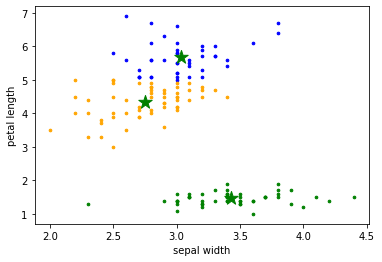

In [50]:
iris  = datasets.load_iris()
x = iris.data[:,1:3] # taking only the sepal length and sepal width as features
y = iris.target # storing the target variables here
predict(x,3,y,125)